# COGS 118A - Final Project

# Indicators of Heart Disease

## Group members

- Bohan Lei
- Zheran Li
- Ryan Choi
- Yiyao Liu
- Duye Liu

# Abstract 

   Our goal in this project is to build prediction models that predict whether or not someone has heart disease based on their health status and ethnographic data. We cleaned the 2020 CDC survey data of 400k adults and choose the features including Smoking, Stroke, PhysicalHealth, DiffWalking, AgeCategory,Diabetic, PhysicalActivity, GenHealth, and KidneyDisease. We split the data into training and testing set, and used gridsearch with four algorithms (Logistic Regression, KNN, Decision Tree, Random Forest) to find four sets of best hyperparameters. We compared the results on the test set, using accuracy and recall as evaluation metrics, and used a 10-fold cross validation to further select the best model, adding roc_auc_score and mean squared error as our metric. Among the four, we decide that best_logistic is the best model. It generates around 73.45% accuracy and has a roc for about 75.3% with the smallest standard deviation across folds. 


# Background

One study that is similar to our project objective is using a machine learning model for predicting out-of-hospital cardiac arrests based on meteorological and chronological data. In this study, the researches used eXtreme Gradient Boosting algorithm to generate a model that predict daily Out-of-hospital cardiac arrest based on  OHCA nationwide registry and high-resolution meteorological and chronological datasets from Japan<a name="ha1"></a>[<sup>[1]</sup>](#ha1note). Their result have shown that combining meteorological and chronological variables in the machine learning model have the best predictive accuracy in both the training and testing datasets<a name="ha1"></a>[<sup>[2]</sup>](#ha1note). Their research outcome have also indicated that factors like holiday, weekend,  low ambient temperature, and large interday or intraday temperature difference are strongly associated out-of-hospital cardiac arrest<a name="ha1"></a>[<sup>[3]</sup>](#ha1note).  

Similarly, a recent study done by the Cedars-Sinai Artificial Intelligence in Medicine division<a name="sota"></a>[<sup>[4]</sup>](#sotanote) found that by combining  CTA and F-NaF PET , two advanced imaging techniques together, the team was able to develop machine learning models that improve the prediction of heart attacks. The team took data from 293 patients from the ages of 56 - 74 years in the span of 53 month, and created three models to predict the possibility of future heart attacks<a name="sota"></a>[<sup>[5]</sup>](#sotanote). By comparing with the other two models they developed based on baseline characteristics and the quantitative plaque analysis variables from CTA, they found that the model that combines CTA and F-NaF PET produce the most accurate result<a name="sota"></a>[<sup>[6]</sup>](#sotanote).

# Problem Statement

According to the CDC and WHO, heart disease is the most common cause of death in the world, responsible for 16% of total deaths. There are some common key risk factors that could increase one’s chance of getting a heart disease including high blood pressure, high cholesterol, physical inactivity, and smoking. Understanding what key risk factors lead to heart disease and avoiding them will make it much easier to prevent getting a heart disease. The original data given by kaggle contains 401,958 rows and 279 columns where each column corresponds to different factors that could lead to heart attack (questions on survey) and each row corresponds to values (answers for questions). 

Using this dataset, we can represent risk of having the disease as binary data (1 for high risk, 0 for low risk), and apply machine learning classification algorithms such as Decision Trees and KNN to detect patterns within the data, which will help us to understand which factors have the greatest impact on heart disease, and build a model to predict someone's risk of havng heart disease given their medical records. We can then use part of the original data to test the model's prediction. With the results, doctors could advise people who have a high chance of getting a heart attack (e.g. family history) what actions to take to lower their chance of getting a heart disease.  


# Data
In this project, we use the Personal Key Indicators of Heart Disease Dataset (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). 

This dataset is based on the 2020 annual Center of Disease Control and Prevention (CDC) survey of around 400k adults related to their health status. The dataset has in total 18 variables and 320,000 observations. Each observation consists of the results of the 18 variables. The variables are: HeartDisease, BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, and SkinCancer. Since the goal of  our project is to find the factors that lead to heart disease, this data sets will best support the need of our project. We can use correlation map to see which factor (such as “Smoking”,”alcholDrinking”, or “stroke”) have the highest correlation to heartdiesase. Then we can used the data set to apply to machine learning algorithms to detect patterns within the data. 

The most important variable is the HeartDisease variable, as that is the variable that we are going to predict by our model. We will use 1 to represent the result of “yes“， and 0 to “no”. This transformation will also be applied into other variables that contain only “yes” and “no”. This includes Smoking, AlcoholDrinking, Stroke, DiffWalking, Diabetic, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer. Also, for sex, we denote 1 as “male” and 0 as “female”. For AgeCategory, since it will be hard for a model to predict a category, we will just use the starting age of the age group. For example, for category “75-79”, we will just replace it as 75. For race and general health, since there are too many categories, we will either use small numbers to represent each category, or use one-hot coding to transfer it into the numbers with 1 and 0. 

To clean the data, we have transformed the variables into machine learning friendly form. We changed all boolean values into binary 0/1, and also changed the range of age into numerical values. After that we looked at the correlation between HeartDiease( our y column) and other features in order to reduce the dimension and complexity of our model. Finally, we are left with about 320000 observations and 10 variables, including 9 features (data cleaning code:https://github.com/COGS118A/Group045-Sp22/blob/main/Cogs_118A_Final_Project_Code_checkpoint.ipynb).

In [1]:
# Take a look at our cleaned data
import pandas as pd
df = pd.read_csv('cleaned_df.csv').drop('Unnamed: 0', axis = 1)
print(df.shape)
df.head()

(319795, 10)


,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
0,0,1,0,3.0,0,55,1,1,3,0
1,0,0,1,0.0,0,80,0,1,3,0
2,0,1,0,20.0,0,65,1,1,1,0
3,0,0,0,0.0,0,75,0,0,2,0
4,0,0,0,28.0,1,40,0,1,3,0


In [6]:
# Note that data is imbalanced
df.groupby('HeartDisease').count()

,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
HeartDisease,,,,,,,,,
0,292422,292422,292422,292422,292422,292422,292422,292422,292422
1,27373,27373,27373,27373,27373,27373,27373,27373,27373


# Proposed Solution

Our problem is a classification problem with binary data, and our data set is sufficiently large. We also have many times more observations than variables. Hence we plan to implement and compare the performance of four different machine learning algorithms (Decision tree, KNN, Random forest, and Logistic Regression) using scikit-learn. We will use a pipeline to standardize data before applying logistic regression. Then we split the data into a training and a testing set, and for each algorithm, we will use a grid search on the training set to find the best hyperparameters. Finally, we will test the performance of our best four models on the testing set. 

# Evaluation Metrics
An ideal model will have a higher chance of predicting correctly whether a person has a high risk of heart disease. We consider classification accuracy to be the most important performance measure of our model because it gives a straightforward measurement of how many correct predictions the model made out of all predictions. However, we also notice that heart disease is a rare situation, so our data is imbalanced. We will try to avoid the “accuracy paradox” and keep track of the model’s ability to identify people of high risk by also evaluating our model’s sensitivity, which is defined by the true positives out of all positives. Both accuracy and sensitivity are common evaluation metrics and we will get a sense of which model is better using these two scores. 

# Results
Link to original code: https://github.com/COGS118A/Group045-Sp22/blob/main/Cogs_118A_Final_Project_Code_full.ipynb

In [2]:
# imports
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score, plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, roc_auc_score, mean_squared_error

In [3]:
# Split the data into training and testing set
X = df.drop(columns=['HeartDisease'])
y = df.HeartDisease
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### 1. Logistic Regression
We first tried without specifying class_weigh, but the resulting model has a very low recall score. We realized that Logistic regression is impacted by class weight balance and non-normal distributed data. Hence, we did a new grid with balanced class weight and used a pipeline to standardize data.

In [10]:
scaler = StandardScaler()
logistic = LogisticRegression(class_weight = 'balanced', random_state = 0)
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])

param_grid = {
    'logistic__solver': ['saga', 'liblinear'],
    'logistic__penalty': ['l1', 'l2']
}

scorings = ['recall','accuracy']
gscv = GridSearchCV(pipe, param_grid, scoring = scorings, refit = 'accuracy').fit(X_train,y_train)

print("The Best Model is : ", gscv.best_estimator_)

The Best Model is :  Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0,
                                    solver='saga'))])


Accuracy for our testing dataset with tuning is : 73.55%
Recall for our testing dataset with tuning is : 76.68%


C:\Users\liuyi\anaconda3\envs\EY_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


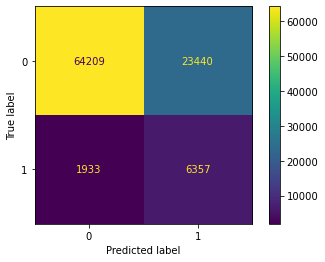

In [11]:
# See the model's performance on testing set
logistic_model = gscv.best_estimator_.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_pred)
test_recall = recall_score(y_test, y_pred)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy*100) )
print("Recall for our testing dataset with tuning is : {:.2f}%".format(test_recall*100) )
plot_confusion_matrix(logistic_model, X_test, y_test) 

### 2. KNN
We first did a grid search with k ranging from 1 to 35, but we realized that the mean accuracy changes very little after k = 20. Hence for time's sake, we will only search in range 12 to 22 this time. 

*Result from initial grid search shown in image below. Code at https://github.com/COGS118A/Group045-Sp22/blob/main/Cogs_118A_Final_Project_Code_full.ipynb*

![](knn_result.png)

In [4]:
knn = KNeighborsClassifier()
k_range = list(range(12, 22))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, scoring='accuracy', verbose = 3)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)
print("The Best Model is : ", grid.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....................n_neighbors=12;, score=0.915 total time=  14.1s
[CV 2/5] END ....................n_neighbors=12;, score=0.915 total time=  11.6s
[CV 3/5] END ....................n_neighbors=12;, score=0.914 total time=  12.0s
[CV 4/5] END ....................n_neighbors=12;, score=0.914 total time=  14.5s
[CV 5/5] END ....................n_neighbors=12;, score=0.915 total time=  14.0s
[CV 1/5] END ....................n_neighbors=13;, score=0.914 total time=  14.2s
[CV 2/5] END ....................n_neighbors=13;, score=0.914 total time=  14.5s
[CV 3/5] END ....................n_neighbors=13;, score=0.913 total time=  14.4s
[CV 4/5] END ....................n_neighbors=13;, score=0.913 total time=  15.1s
[CV 5/5] END ....................n_neighbors=13;, score=0.914 total time=  14.6s
[CV 1/5] END ....................n_neighbors=14;, score=0.915 total time=  14.3s
[CV 2/5] END ....................n_neighbors=14;

Text(0.5, 1.0, 'Mean Accuracy across different K values')

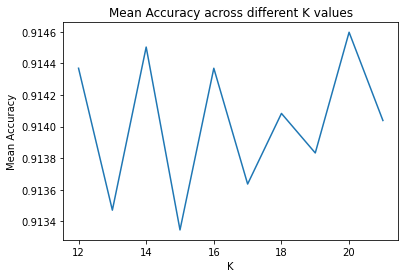

In [5]:
# Visualize hyperparam search
plt.plot(range(12,22),grid.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different K values')

From the plot above, the best K-value for KNN should be 20, because the mean accuracy is similar after 20, and we want to prevent the model from going too complex. 

Accuracy for our testing dataset with tuning is : 91.34%
Recall for our testing dataset with tuning is : 3.76%


C:\Users\liuyi\anaconda3\envs\EY_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


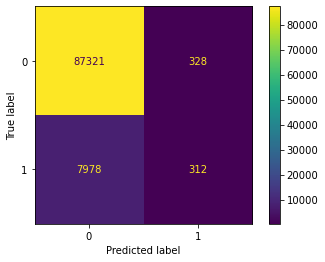

In [6]:
# See the model's performance on testing set
knn_model = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
y_pred = knn_model.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_pred)
test_recall = recall_score(y_test, y_pred)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy*100) )
print("Recall for our testing dataset with tuning is : {:.2f}%".format(test_recall*100) )
plot_confusion_matrix(knn_model, X_test, y_test) 

### 3. Decision Tree

In [47]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state = 0)
parameters = {'max_depth': range(2,12), 'min_samples_leaf':[15,20,25,30]}
scorings = ['recall','accuracy']
treeGrid = GridSearchCV(tree, parameters, scoring = scorings, refit = 'accuracy').fit(X_train, y_train)
print("The Best Model is : ", treeGrid.best_estimator_)

The Best Model is :  DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_leaf=15, random_state=0)


Text(0.5, 1.0, 'Mean Accuracy across different Max Depth')

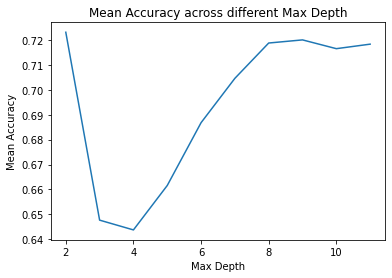

In [50]:
# Visualize hyperparam search
r = treeGrid.cv_results_['mean_test_accuracy']
result = [np.mean(r[i*4:i*4+4]) for i in range(0,10)]
plt.plot(range(2,12),result)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different Max Depth')

Accuracy for our testing dataset with tuning is : 72.25%
Recall for our testing dataset with tuning is : 70.74%


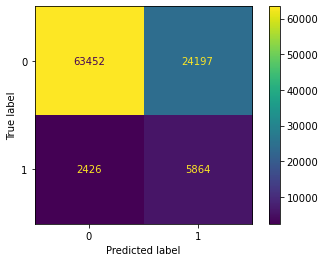

In [30]:
# See the model's performance on testing set
tree_model = treeGrid.best_estimator_.fit(X_train, y_train)
y_pred = tree_model.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_pred)
test_recall = recall_score(y_test, y_pred)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy*100) )
print("Recall for our testing dataset with tuning is : {:.2f}%".format(test_recall*100) )
plot_confusion_matrix(tree_model, X_test, y_test) 

### 4. Random Forest
1. We used a similar grid search with RandomForestClassifier, choosing from max_depth in range(2,12), min_samples_leaf in [15,20,25,30], and n_estimators in [100, 150, 200, 250]. Like the previous algorithms, we used accuracy and recall as scorings, and a default of 5 fold cross validation. 

    This grid shows that our best estimator is:  RandomForestClassifier(max_depth=8, min_samples_leaf=15, n_estimators=150,random_state=0). However, the output shows that without settng class_weight to 'balanced', the model has a 91.47% test accuracy, but a 4.34% recall. 


2. Hence, we did a refined grid search with balanced class_weight, choosing from max_depth in range(6, 12), min_samples_leaf in [15,20], and n_estimators in [100, 150, 200]. 

    This new grid search shows that our best estimator is: RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=15, n_estimators=200, random_state=0)

The original code and output are at https://github.com/COGS118A/Group045-Sp22/blob/main/Cogs_118A_Final_Project_Code_full.ipynb. 

Accuracy for our testing dataset with tuning is : 72.23%
Recall for our testing dataset with tuning is : 78.48%


C:\Users\liuyi\anaconda3\envs\EY_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


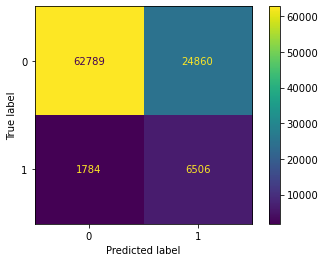

In [15]:
# See the Balanced model's performance on testing set
forest_model = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=15, n_estimators=200, random_state=0).fit(X_train, y_train)
y_pred = forest_model.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_pred)
test_recall = recall_score(y_test, y_pred)
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy*100) )
print("Recall for our testing dataset with tuning is : {:.2f}%".format(test_recall*100) )
plot_confusion_matrix(forest_model, X_test, y_test) 

### 5. Comparison
The algorithms' performance on the testing set show that without class balancing, KNN generates a very low recall. Logistic Regression, and Rondom Forest all have about 70% accuracy and recall. We now compare the best set of parameters of the last three models using a 10-fold cross validation with all data, and add some more evaluation metrics, including roc_auc, mse, and the fluctuation of these metrices across folds.

In [4]:
# Our best models
best_logistic = Pipeline(steps=[('scaler', StandardScaler()),
                                ('logistic',LogisticRegression(class_weight='balanced', random_state=0,solver='saga'))])
best_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=2,min_samples_leaf=15, random_state=0)
best_forest = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=15, n_estimators=200, random_state=0)

In [39]:
# for Logistic model
k = KFold(n_splits=10, random_state=1, shuffle=True)

# Make a mean squared error scorer for evaluation
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(best_logistic, X,y,cv=k, scoring=mse_scorer)

# Make a auc_roc scorer for evaluation
roc_scorer = make_scorer(roc_auc_score)
roc_score = cross_val_score(best_logistic, X, y, cv = k, scoring = roc_scorer)

scores = cross_val_score(best_logistic,X,y, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))
print('mean MSE across folds:', np.mean(rmse_score), ' standard deviation of  MSE across folds:',np.std(rmse_score))
print('mean roc across folds:',  np.mean(roc_score), ' standard deviation of  roc across folds:', np.std(roc_score))

Mean Accuracy: 73.45 %
Standard Deviation: 0.23 %
Max Accuracy: 73.97 %
mean MSE across folds: 0.2655232313083197  standard deviation of  MSE across folds: 0.0023247822579465383
mean roc across folds: 0.7530172334967745  standard deviation of  roc across folds: 0.006105441340513054


In [40]:
# for Decision Tree model
k = KFold(n_splits=10, random_state=1, shuffle=True)

# Make a mean squared error scorer for evaluation
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(best_tree, X,y,cv=k, scoring=mse_scorer)

# Make a auc_roc scorer for evaluation
roc_scorer = make_scorer(roc_auc_score)
roc_score = cross_val_score(best_tree, X, y, cv = k, scoring = roc_scorer)

scores = cross_val_score(best_tree,X,y, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))
print('mean MSE across folds:', np.mean(rmse_score), ' standard deviation of  MSE across folds:',np.std(rmse_score))
print('mean roc across folds:',  np.mean(roc_score), ' standard deviation of  roc across folds:', np.std(roc_score))

Mean Accuracy: 72.29 %
Standard Deviation: 0.24 %
Max Accuracy: 72.62 %
mean MSE across folds: 0.2770806446600813  standard deviation of  MSE across folds: 0.0023820158577512016
mean roc across folds: 0.716951603060406  standard deviation of  roc across folds: 0.006264756062238198


In [5]:
# for Random Forest model
k = KFold(n_splits=10, random_state=1, shuffle=True)

# Make a mean squared error scorer for evaluation
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(best_forest, X,y,cv=k, scoring=mse_scorer)

# Make a auc_roc scorer for evaluation
roc_scorer = make_scorer(roc_auc_score)
roc_score = cross_val_score(best_forest, X, y, cv = k, scoring = roc_scorer)

scores = cross_val_score(best_forest,X,y, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))
print('mean MSE across folds:', np.mean(rmse_score), ' standard deviation of  MSE across folds:',np.std(rmse_score))
print('mean roc across folds:',  np.mean(roc_score), ' standard deviation of  roc across folds:', np.std(roc_score))

Mean Accuracy: 72.14 %
Standard Deviation: 0.39 %
Max Accuracy: 72.78 %
mean MSE across folds: 0.27860347983601885  standard deviation of  MSE across folds: 0.00387886124851526
mean roc across folds: 0.7534741129039446  standard deviation of  roc across folds: 0.006108827211943656


# Discussion

### Interpreting the result

Based on the performance on testing data, Logistic Regressoin has an accuracy of 73.55% and recall of 76.68%, Decision Tree has an accuracy of 
72.25% and recall of 70.74%, and Random Forest has an accuracy of 72.23% and recall of 78.48%. Based on the k-fold cross validation, we decide that best_logistic is the best model. It generates around 73.45% accuracy and has a roc for about 75.3%, with the smallest deviation across folds. Although theoretically Random Forest should have higher predictive power, the hyperparameters may be overfit, or it needs some preprocessing. 

We also notice that in predicting risk for disease, class balance plays a crucial role. In our original grid search, we achieve a high accuracy but with a low recall. There is a tradeoff between having the model preferring 0 class, which produces a high accuracy, and having a higher recall score, which is more practical for real-world application. Selecting algorithms that are resistant to imbalance can have a great impact. 

### Limitations

A possibel improvement is to have a randomized search before applyting grid search to try out a wider range of hyperparameters. Second, we used pearson correlation to select features, but we did not account for practicality in this method. For example, we can use aging to predict risk of heart disease, but we already know it from common knowledge. By using other features, it is possible to investigate the correlation and interaction of more health factors with heart disease. Hence, another possible improvement is to use methods such as PCA and specifying number of features in Random Forest to do feature selection. Third, our data is highly imbalanced, and we tried to account for this by setting class_weight. However, there can be other ways to solve this problem, including getting a large population and sampling the same amount of data for both classes. 


### Ethics & Privacy

The ethics problem is divided into 5 phases: data collection phase, data storage phase, data analysis phase, data modeling phase, and deployment phase.
- For the data collection phase, since this dataset was collected by CDC and published for public use, we can assume the collecting agency was held to official standards. We can assume that it could represent the population in the US, and it does not have a strong collecting bias. 
- For the data storage phase, first of all, since this is a public data collection, we do not need to consider the data privacy problem. Also, since this is the data collected in 2020, we also do not need to be concerned about the problem of the updated data, since the update was already fixed.
- For the data analysis phase, the data itself could lead to some kind of biases against a specific group of people. We will try our best to reduce such biases by doing visualizations and observations to supervise the learning process.
- For the data modeling phase, the models we generate might also have prediction bias against specific groups of data. We will make use of the best unbiased model for our prediction to suppress such bias. 
- For the deployment phase, some of our models might be used for future prediction which generate prediction bias. We will address this problem at the end of our model build. 

### Conclusion

We built classification models that predict whether or not someone has heart disease based on their health status and ethnographic data. We cleaned the 2020 CDC survey data of 400k adults and choose features including Smoking, Stroke, PhysicalHealth, DiffWalking, AgeCategory,Diabetic, PhysicalActivity, GenHealth, and KidneyDisease. We split the data into training and testing set, and used gridsearch with four algorithms (Logistic Regression, KNN, Decision Tree, Random Forest) to find four sets of best hyperparameters. While tuning the hyperparameters, we noticed a tradeoff between higher accuracy and better real world application. After comparing their accuracy and recall on test set, we ruled out KNN because it does not fit well for our unbalanced dataset. We then used a 10-fold cross validation with roc_auc and mse as additional metrics, and eventually selected logistic regression as the best model. It generates around 73.45% accuracy and has a roc for about 75.3% with the smallest standard deviation across folds. Further steps can be taken to improve our project, including searching for a wider range of hyperparameters, trying out more feature selection methods, and dealing with class imbalance in other ways. 

# Footnotes
<a name="ha1note"></a>1.[^](#ha1): https://heart.bmj.com/content/107/13/1084<br> 

<a name="sotanote"></a>2.[^](#sota): https://physicsworld.com/a/machine-learning-and-advanced-imaging-improve-prediction-of-heart-attacks/